# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
school_vax = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
                      col_types=cols())

The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here

vacc_rates = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
                      col_types = cols()) 

df_vacc_rates = vacc_rates |>
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(
        vaxrates_above95 = sum(mmr >=95, na.rm=TRUE),
        frac_above_95 = sum(mmr >=95, na.rm=TRUE) / n()
    ) |>
    arrange(vaxrates_above95)

df_vacc_rates |> head()


state,vaxrates_above95,frac_above_95
<chr>,<int>,<dbl>
Arkansas,2,0.003527337
North Dakota,164,0.455555556
Maine,169,0.473389356
Vermont,231,0.683431953
South Dakota,277,0.742627346
Montana,370,0.708812261


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [ ]:
#Arkansas has the smallest fraction of schools above the CDC target vaccination rate of 95%

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

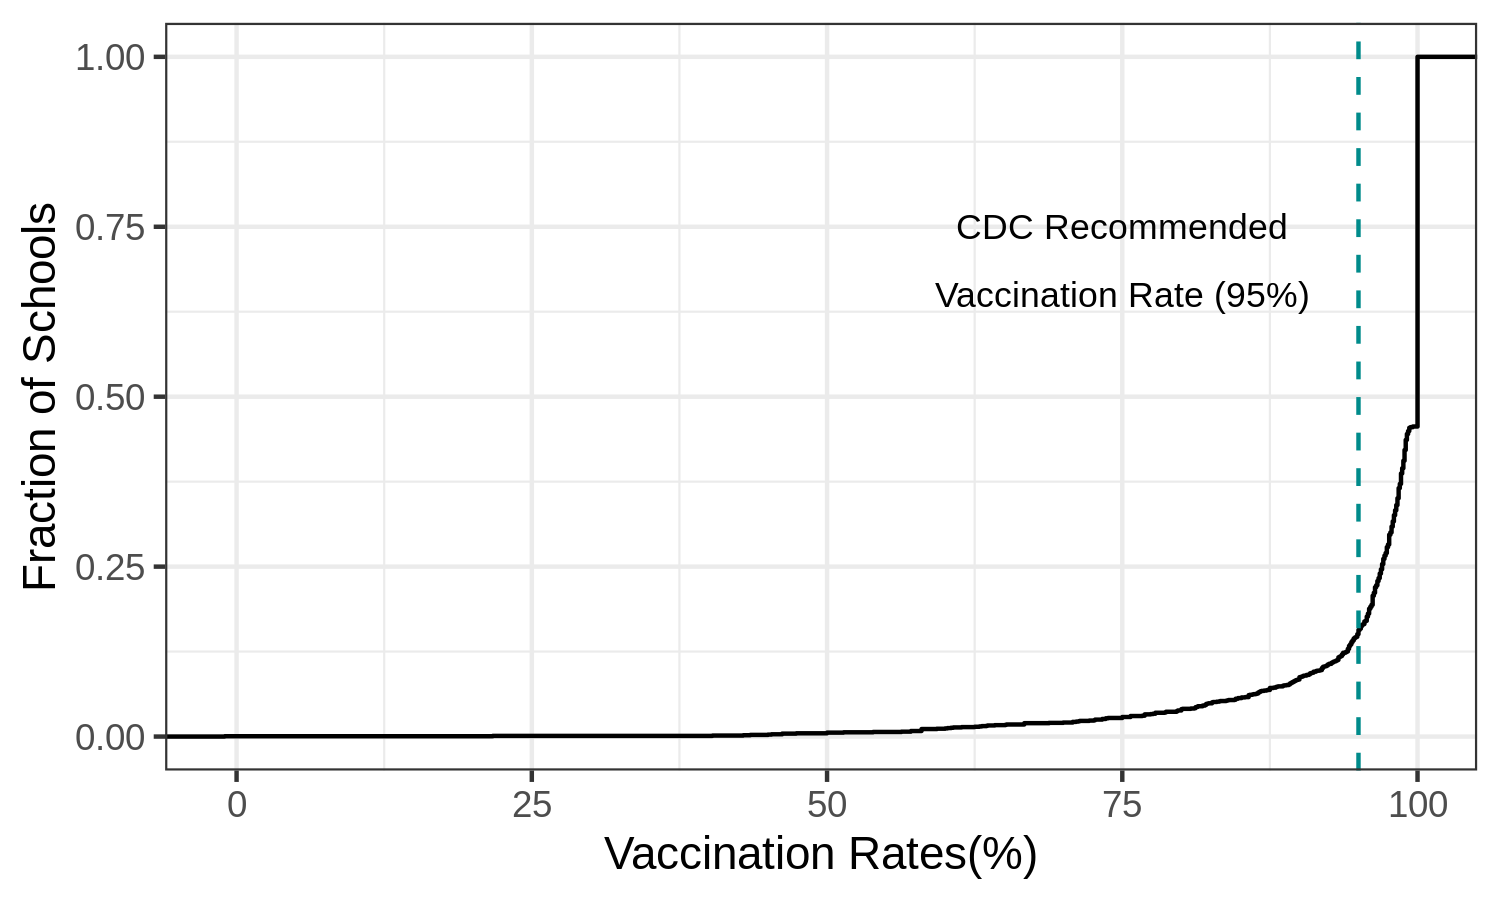

In [4]:
nc<-school_vax[school_vax$state=="North Carolina",]

options(repr.plot.height = 3, repr.plot.width = 5)
p = ggplot(nc, aes(x=overall))
p = p + stat_ecdf(geom="step")+ 
    theme_bw()+
    xlab('Vaccination Rates(%)')+
    ylab('Fraction of Schools')
p = p + geom_vline(xintercept=95, color = "darkcyan", linetype = "dashed")
p = p + annotate("text", x = 75, y = 0.75, size=3, label = "CDC Recommended")
p = p + annotate("text", x = 75, y = 0.65, size=3, label = "Vaccination Rate (95%)")
p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [5]:
median(nc$overall) #Yes, median is 100

[1] 100